In [1]:
# Your code here. 
#Visualización (el mantra)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]


In [22]:
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})

In [23]:
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

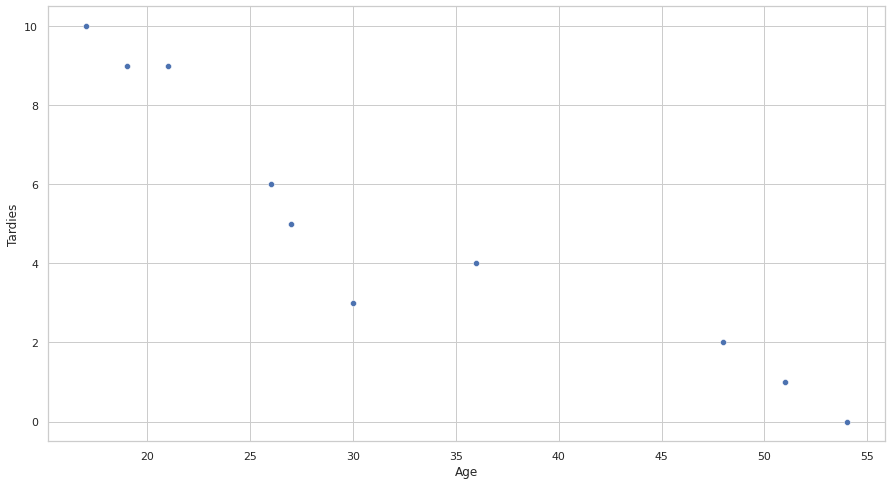

In [26]:
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies']);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [28]:
# Your response here. 
"""There is a negative trend between the 2 variables, the higher the age, the less tardies you find and viceversa."""

'There is a negative trend between the 2 variables, the higher the age, the less tardies you find and viceversa.'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [37]:
# Your response here.
"""
The covariance shows that there is a negative relation between the 2 variables.
"""
cov = pd.DataFrame(np.cov(student_data['Age'],student_data['Tardies']))
cov

,0,1
0,187.655556,-45.566667
1,-45.566667,12.544444


In [34]:
"""
The correlation shows that both variables are inversely proportioned.
"""
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [39]:
lr = LinearRegression()
lr.fit(
    X = student_data[["Age"]],
    y = student_data.Tardies 
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
    
"""
The outcome variable is the days you are late. It is a linear regression.
"""

12.888803363135771 -0.2428207709159809


In [42]:
student_data["predicción"] = (student_data.Age * lr.coef_[0]) + lr.intercept_

Plot your regression model on your scatter plot.

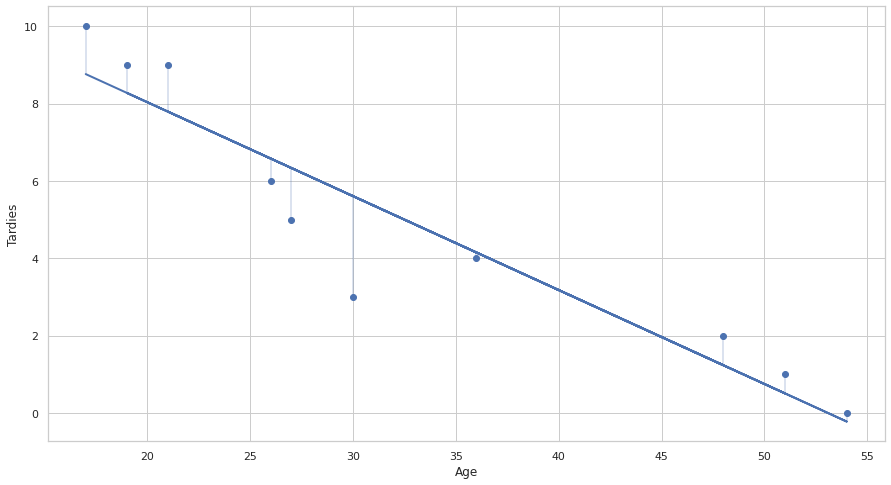

In [47]:
# Your code here.
linea = beta_0 + beta_1 * student_data.Age
plt.scatter(student_data.Age,student_data.Tardies)
plt.plot(student_data.Age,linea, lw=2)
plt.vlines(student_data.Age,linea,student_data.Tardies, lw=0.4)
plt.xlabel("Age")
plt.ylabel("Tardies");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [48]:
# Your response here. 
results = smf.ols("Age ~ Tardies", data=student_data).fit()
results.summary()
"""
There is an R-squared of 0.882, which means that our model is trustworthy.
"""

/home/andrestart/anaconda3/envs/iron/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.57e-05
Time:                        17:01:34   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [70]:
# Import any libraries you may need & the data
cars = pd.read_csv("vehicles.csv")
cars.rename({'CO2 Emission Grams/Mile':'CO2', 'Fuel Barrels/Year':'fuelbar_y', 'Combined MPG':'mpg', 'Fuel Cost/Year':'fuelcost_y'}, axis=1, inplace=True)
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,fuelbar_y,City MPG,Highway MPG,mpg,CO2,fuelcost_y
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [85]:
e = cars[['CO2','Year', 'Cylinders', 'fuelbar_y', 'mpg', 'fuelcost_y']]
e.corr()
noco2 = cars[['Year', 'Cylinders', 'fuelbar_y', 'mpg', 'fuelcost_y']]
"""
Fuel barrels/Year is the most important variable in determining CO2 emissions is the Fuel Barrels/Year, as its relation is the highest (0.98), a value that is very close to 1, almost totally direct.
The variable with the least amount of helpful is "Year", as its relation is very close to 0.00 (what would be no relation at all).
"""

'\nFuel barrels/Year is the most important variable in determining CO2 emissions is the Fuel Barrels/Year, as its relation is the highest (0.98), a value that is very close to 1, almost totally direct.\nThe least helpful is "Year", as its relation is very close to 0.00 (what would be no relation at all).\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [90]:
# Your response here. 
lr = LinearRegression()
lr.fit(noco2, e[['CO2']])
e["predict"] = lr.predict(noco2)

/tmp/ipykernel_633/2305599400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e["predict"] = lr.predict(noco2)


In [91]:
e.head()

,CO2,Year,Cylinders,fuelbar_y,mpg,fuelcost_y,predict
0,522.764706,1984,4.0,19.388824,17,1950,522.030384
1,683.615385,1984,6.0,25.354615,13,2550,671.001053
2,555.437500,1985,4.0,20.600625,16,2100,552.684951
3,683.615385,1985,6.0,25.354615,13,2550,670.680436
4,555.437500,1987,6.0,20.600625,16,2550,570.340582


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [75]:
# Your response here. 
"""
P values in every variable are 0.00, meaninig that all of them are meaningful.
The most important variable in determining CO2 emissions is the Fuel Barrels/Year, as its coefficient is the highest (19.05)
The least amount is
"""
results = smf.ols("CO2 ~ Year + Cylinders + fuelbar_y + mpg + fuelcost_y", data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:25:06   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    769.8883     19.392     39.702      0.000     731.880     807.897
Year          -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders      1.8788      0.083     22.598      0.000       1.716       2.042
fuelbar_y     19.0529      0.061    311.600      0.000      18.933      19.173
mpg           -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuelcost_y     0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [98]:
# Your code here. 
party = pd.DataFrame({'inv':[1,3,4,6,8,9,11,14], 'att':[1,2,4,4,5,7,8,13]})
party

,inv,att
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

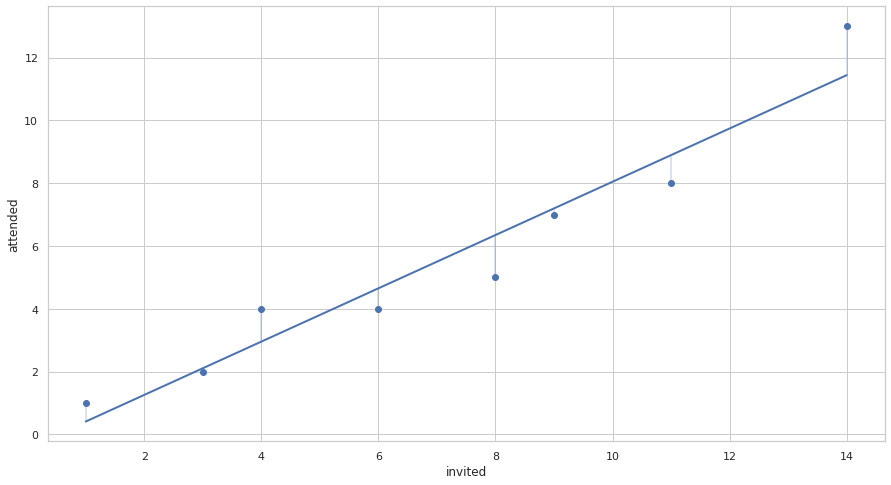

In [104]:
lr2 = LinearRegression()
lr2.fit(
    X = party[["inv"]],
    y = party.att
)
beta_1_2 = lr2.coef_[0]
beta_0_2 = lr2.intercept_

linea = beta_0_2 + beta_1_2 * party[["inv"]]
plt.scatter(party[["inv"]],party.att)
plt.plot(party[["inv"]],linea, lw=2)
plt.vlines(party[["inv"]],linea,party.att, lw=0.4)
plt.xlabel("invited")
plt.ylabel("attended");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [106]:
# Your response here. 
"""
There is a direct relationship between both variables, when one grows the other grows too.
"""
results = smf.ols("inv ~ att", data=party).fit()
results.summary()

/home/andrestart/anaconda3/envs/iron/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    inv   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000102
Time:                        17:52:09   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
att            1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [123]:
party2 = pd.DataFrame({'inv':[1,3,4,6,8,9,11], 'att':[1,2,4,4,5,7,8]})

In [125]:
results = smf.ols("inv ~ att", data=party2).fit()
results.summary()

/home/andrestart/anaconda3/envs/iron/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    inv   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000264
Time:                        18:05:48   Log-Likelihood:                -8.2295
No. Observations:                   7   AIC:                             20.46
Df Residuals:                       5   BIC:                             20.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1061      0.755     -0.140      0.894      -2.048       1.835
att            1.3788      0.151      9.127      0.000       0.990       1.767
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.634
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.200
Skew:                          -0.282   Prob(JB):                        0.905
Kurtosis:                       2.394   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

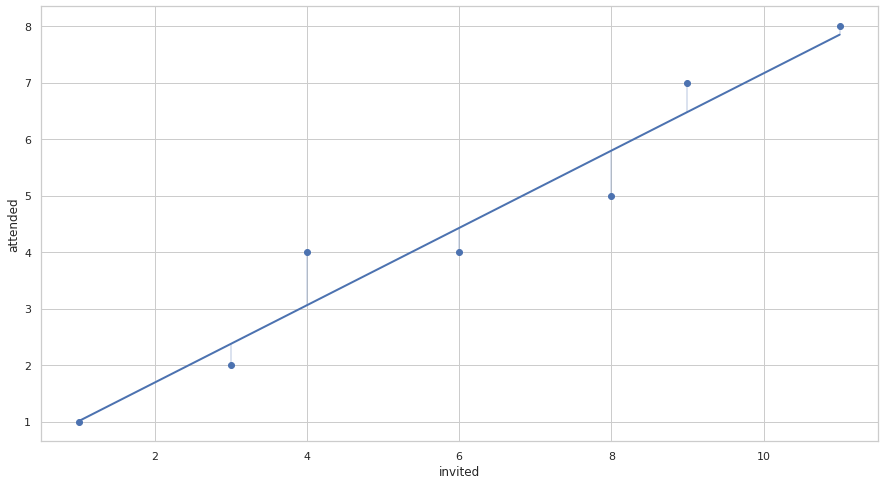

In [124]:
# Your response here.

lr3 = LinearRegression()
lr3.fit(
    X = party2[["inv"]],
    y = party2.att
)
beta_1_3 = lr3.coef_[0]
beta_0_3 = lr3.intercept_

linea = beta_0_3 + beta_1_3 * party2[["inv"]]
plt.scatter(party2[["inv"]],party2.att)
plt.plot(party2[["inv"]],linea, lw=2)
plt.vlines(party2[["inv"]],linea,party2.att, lw=0.4)
plt.xlabel("invited")
plt.ylabel("attended");

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
"""
The R-squared value has raised, meaning that our regression model has improved because the line ploted is closer to the data.
"""